# Visualizing bus stops by community areas 

Source for community shapefiles: https://data.cityofchicago.org/Facilities-Geographic-Boundaries/Boundaries-Community-Areas-current-/cauq-8yn6
Soource for bus stops geometries: https://data.cityofchicago.org/Transportation/CTA-Bus-Stops-Shapefile/pxug-u72f/about_data 

In [1]:
import geopandas as gdp
import os
import matplotlib as plt

In [2]:
# Load communities shapefile
shapefiles_path = os.path.realpath("../") + "/shapefiles/"
gdf_communities = gdp.read_file(shapefiles_path + "Boundaries - Community Areas (current).geojson")
gdf_communities.head(3)


,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ..."
1,OAKLAND,0,16913961.0408,0,36,36,0,0,19565.5061533,"MULTIPOLYGON (((-87.59215 41.81693, -87.59231 ..."
2,FULLER PARK,0,19916704.8692,0,37,37,0,0,25339.0897503,"MULTIPOLYGON (((-87.62880 41.80189, -87.62879 ..."
3,GRAND BOULEVARD,0,48492503.1554,0,38,38,0,0,28196.8371573,"MULTIPOLYGON (((-87.60671 41.81681, -87.60670 ..."
4,KENWOOD,0,29071741.9283,0,39,39,0,0,23325.1679062,"MULTIPOLYGON (((-87.59215 41.81693, -87.59215 ..."
...,...,...,...,...,...,...,...,...,...,...
72,MOUNT GREENWOOD,0,75584290.0209,0,74,74,0,0,48665.1305392,"MULTIPOLYGON (((-87.69646 41.70714, -87.69644 ..."
73,MORGAN PARK,0,91877340.6988,0,75,75,0,0,46396.419362,"MULTIPOLYGON (((-87.64215 41.68508, -87.64249 ..."
74,OHARE,0,371835607.687,0,76,76,0,0,173625.98466,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ..."
75,EDGEWATER,0,48449990.8397,0,77,77,0,0,31004.8309456,"MULTIPOLYGON (((-87.65456 41.99817, -87.65456 ..."


In [3]:
gdf_stops = gdp.read_file(shapefiles_path + "CTA_BusStops/CTA_BusStops.shp")
gdf_stops.head(3)

,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM,geometry
0,5282.0,JEFFERY,97TH STREET,NB,MT,15,None,CHICAGO,Jeffery & 97th Street,POINT (-87.57521 41.71888)
1,1143.0,STOCKTON,WEBSTER,NB,NT,"151,156",None,CHICAGO,Stockton & Webster,POINT (-87.63563 41.92192)
2,15703.0,HARLEM,SCHNEIDER,NB,NS,90,None,OAK PARK,Harlem & Schneider,POINT (-87.80512 41.89619)
3,6501.0,WENTWORTH,3200 SOUTH,SB,MB,"24,31",None,CHICAGO,3200 S Wentworth,POINT (-87.63168 41.83648)
4,1593.0,MICHIGAN,14TH STREET,SB,FS,"1,3,4",N4,CHICAGO,Michigan & 14th Street,POINT (-87.62419 41.86388)
...,...,...,...,...,...,...,...,...,...,...
10755,18379.0,HARLEM,AUGUSTA,NB,FS,90,None,OAK PARK,Harlem & Augusta,POINT (-87.80521 41.89799)
10756,18084.0,69TH STREET,DAMEN,EB,FS,67,None,CHICAGO,69th Street & Damen,POINT (-87.67337 41.76837)
10757,10274.0,CICERO,21ST STREET,NB,NS,54,None,CICERO,Cicero & 21st Street,POINT (-87.74420 41.85310)
10758,7111.0,STONY ISLAND,84TH STREET,NB,NS,28,None,CHICAGO,Stony Island & 84th Street,POINT (-87.58530 41.74246)


<Axes: >

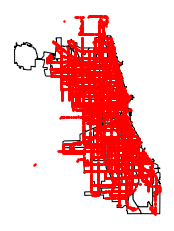

In [6]:
boundaries = gdf_communities.plot(color = "white", edgecolor = "black")
boundaries.set_axis_off()
gdf_stops.plot(ax = boundaries, 
               marker = "o", 
               color = "red", 
               markersize = 2)

In [8]:
# Merge bus_stops with community areas 
# gdp_stops_community = 


## Check projections before merge 

# Merge data

gdf_communities = gdf_communities.sjoin(gdf_stops, how="left")
gdf_communities.head(3)

,community,area,shape_area,perimeter,area_num_1,area_numbe,comarea_id,comarea,shape_len,geometry,index_right,SYSTEMSTOP,STREET,CROSS_ST,DIR,POS,ROUTESSTPG,OWLROUTES,CITY,PUBLIC_NAM
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",10648,7752.0,PERSHING,GILES,WB,NS,39,None,CHICAGO,Pershing & Giles
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",576,7751.0,PERSHING,KING DRIVE,WB,FS,39,None,CHICAGO,Pershing & King Drive
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",1426,7750.0,PERSHING,KING DRIVE,WB,NS,39,None,CHICAGO,Pershing & King Drive
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",9184,2163.0,KING DRIVE,PERSHING,NB,FS,3,None,CHICAGO,King Drive & Pershing
0,DOUGLAS,0,46004621.1581,0,35,35,0,0,31027.0545098,"MULTIPOLYGON (((-87.60914 41.84469, -87.60915 ...",7916,18292.0,PERSHING,VINCENNES,WB,FS,39,None,CHICAGO,Pershing & Vincennes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,EDISON PARK,0,31636313.7864,0,9,9,0,0,25937.226841,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",111,9927.0,NORTHWEST HWY,OLIPHANT,SEB,NS,68,None,CHICAGO,Northwest Hwy & Oliphant
76,EDISON PARK,0,31636313.7864,0,9,9,0,0,25937.226841,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",2996,9925.0,NORTHWEST HWY,OVERHILL,SEB,FS,68,None,CHICAGO,Northwest Hwy & Overhill
76,EDISON PARK,0,31636313.7864,0,9,9,0,0,25937.226841,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",8892,9910.0,NORTHWEST HWY,OVERHILL,NWB,FS,68,None,CHICAGO,Northwest Hwy & Overhill
76,EDISON PARK,0,31636313.7864,0,9,9,0,0,25937.226841,"MULTIPOLYGON (((-87.80676 42.00084, -87.80676 ...",3380,9924.0,NORTHWEST HWY,OZARK,SEB,NS,68,None,CHICAGO,Northwest Hwy & Ozark


----------------
# Trips data

In [15]:
import os
import pandas as pd
import geopandas as gdp


trips_path = os.path.realpath("../") + "/cta-stop-etl/out/parquets/"
trips_path

all_dates = os.listdir(trips_path)

trips_data = pd.read_parquet(str(trips_path) + str(all_dates[0]))
trips_data.head(3)

,vid,tmstmp,lat,lon,hdg,pid,rt,des,pdist,dly,tatripid,origtatripno,tablockid,zone,scrape_file,data_time,data_hour,data_date
0,7972,20230709 00:02,41.894955,-87.624184,356,18414.0,3,Michigan/Chicago,68124,False,153717,245958645,3 -715,None,bus_data/2023-07-09/00:02:56.json,2023-07-09 00:02:00,0,2023-07-09
1,7987,20230709 00:02,41.895912,-87.624405,180,18415.0,3,95th/RED LINE,2798,False,1051753,245959291,3 -705,None,bus_data/2023-07-09/00:02:56.json,2023-07-09 00:02:00,0,2023-07-09
2,1291,20230709 00:02,41.872401,-87.624268,190,18415.0,3,95th/RED LINE,11425,False,1051752,245958880,3 -720,None,bus_data/2023-07-09/00:02:56.json,2023-07-09 00:02:00,0,2023-07-09


In [19]:
json_data = []

for idx, point in trips_data.iterrows(): 
    point_dict = {}
    point_dict["position"] = [point["lat"], point["lon"]]
    point_dict["type"] = point["vid"]
    point_dict["tmstmp"] = point["data_time"]

    json_data.append(point_dict)

json_data

[{'position': [41.894954681396484, -87.62418365478516], 'type': 7972},
 {'position': [41.895912170410156, -87.62440490722656], 'type': 7987},
 {'position': [41.872401101248606, -87.624267578125], 'type': 1291},
 {'position': [41.82411575317383, -87.61705780029297], 'type': 1261},
 {'position': [41.78630542755127, -87.61578893661499], 'type': 1222},
 {'position': [41.78584289550781, -87.61581420898438], 'type': 1416},
 {'position': [41.72026684409693, -87.62365963584499], 'type': 7992},
 {'position': [41.87745516227953, -87.62438016949278], 'type': 1302},
 {'position': [41.8528817983774, -87.62379749004657], 'type': 1359},
 {'position': [41.83866357803345, -87.62348937988281], 'type': 1326},
 {'position': [41.788278908565125, -87.6060562133789], 'type': 1591},
 {'position': [41.745509349938594, -87.60514831542969], 'type': 7980},
 {'position': [41.72185134887695, -87.61344146728516], 'type': 7952},
 {'position': [41.785681221701886, -87.60593927556818], 'type': 7982},
 {'position': [41.